#  MSCA 37011 - Deep Learning and Image Recognition

## Monte Carlo methods - Pi Estimation

https://auralbits.blogspot.com/2014/06/a-monte-carlo-example-in-python.html

What are Monte Carlo methods? A Monte Carlo method is a probabilistic algorithm that relies on random sampling rather than strict determinism to obtain its result. Monte Carlo methods are useful in many fields, particularly when the complexity of the problem in question renders deterministic solutions infeasible.

Let r = 1.0 be both the radius of the circle and the length of one side of the square, then the area of the quarter-circle inside the square is $(1/4)πr^2$ and the area of the square is $r^2$, making the ratio of these two areas

$$((1/4)πr^2)/r^2=π/4$$

A Monte Carlo method for determining π using this knowledge works by

    Drawing a set of random points from inside the unit square

    Counting the number of points that fall inside the quarter of the unit circle

    Calculating the ratio of the number of points inside the quarter of the unit circle to the total number of points, which approaches π/4 as the number of random points increases.

This algorithm illustrates the main features of a Monte Carlo method: random (uniformly-distributed) simulation of trials applied over a system that converges as the number of trials increases.

In [19]:
from matplotlib import pyplot as plt
import math
import numpy as np
import pandas as pd

%matplotlib inline

In [20]:
n_points = 30000

In [21]:
df = pd.DataFrame(np.random.rand(n_points, 2), columns=['x', 'y'])
print (df[:10])

          x         y
0  0.142229  0.321047
1  0.649571  0.190168
2  0.477812  0.526600
3  0.165572  0.060867
4  0.419180  0.945719
5  0.750061  0.767958
6  0.611300  0.330005
7  0.430077  0.616761
8  0.104865  0.555839
9  0.858346  0.683011


In [22]:
def within_unit_circle(row):
    x, y = row['x'], row['y']
    return math.sqrt(x**2.0 + y**2.0) <= 1.0

In [23]:
df['within_unit_circle'] = df.apply(within_unit_circle, axis=1)
print (df[:10])

          x         y  within_unit_circle
0  0.142229  0.321047                True
1  0.649571  0.190168                True
2  0.477812  0.526600                True
3  0.165572  0.060867                True
4  0.419180  0.945719               False
5  0.750061  0.767958               False
6  0.611300  0.330005                True
7  0.430077  0.616761                True
8  0.104865  0.555839                True
9  0.858346  0.683011               False


In [24]:
boolean_frame = pd.DataFrame({
    'true_blue': [True, True, True],
    'falsehood': [False, False, False],
    'unseemly_fraternization': [True, False, True],
})

print (boolean_frame['true_blue'].sum())
print (boolean_frame['falsehood'].sum())
print (boolean_frame['unseemly_fraternization'].sum())

3
0
2


In [25]:
df['within_unit_circle'].sum()

23627

In [26]:
almost_pi = df['within_unit_circle'].sum() / len(df) * 4.0

print (almost_pi)
print (math.pi)
print (abs(almost_pi - math.pi))

3.1502666666666665
3.141592653589793
0.008674013076873432


[0.0, 1.0, 0.0, 1.0]

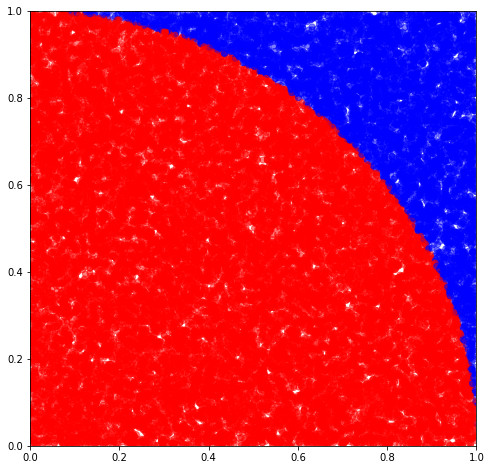

In [27]:
plt.scatter(df['x'], df['y'], c=[within and 'red' or 'blue' for within in df['within_unit_circle']], alpha=0.5)

fig = plt.gcf()
fig.set_figwidth(8)
fig.set_figheight(8)

ax = plt.gca()
ax.axis([0.0, 1.0, 0.0, 1.0])